In [1]:
#basic analysis package
import numpy as np
import pandas as pd
from pathlib import Path
import tifffile as tf
from importlib import reload
from util import pil_imread
#matlab garbage api
import matlab.engine
#custom packages
import fiducial_alignment_affine as fa_affine

In [4]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

def plot_2d_image(img_2d, zmax=1000, animation = True):
    
    if animation == True:   
    #For Plotting 2d image
        #-------------------------------------------
        fig = px.imshow(
            img_2d,
            width=700,
            height=700,
            binary_string=True,
            binary_compression_level=4,
            binary_backend='pil',
            zmax = zmax,
            animation_frame=0
        )
        #-------------------------------------------

        fig.show()
    else:
        #For Plotting 2d image
        #-------------------------------------------
        fig = px.imshow(
            img_2d,
            width=700,
            height=700,
            binary_string=True,
            binary_compression_level=4,
            binary_backend='pil',
            zmax = zmax,
        )
        #-------------------------------------------

        fig.show()

In [5]:
def plot_2d_locs_on_2d_image(df_locs_2d_1, img_2d, zmax=1000):
    
    #For Plotting 2d image
    #-------------------------------------------
    fig = px.imshow(
        img_2d,
        width=700,
        height=700,
        binary_string=True,
        binary_compression_level=4,
        binary_backend='pil',
        zmax = zmax
    )
    #-------------------------------------------
    
    #For Plotting 2d dots
    #-------------------------------------------
    fig.add_trace(go.Scattergl(
        x=df_locs_2d_1.x,
        y=df_locs_2d_1.y,
        mode='markers',
        marker_symbol='cross',
        marker=dict(
            #maxdisplayed=1000,
            size=4
            ),
        name = "Gaussian"
        )
    )
    #-------------------------------------------
    
    fig.show()

In [14]:
#get image paths
Pos = 1
bead_src = Path("/groups/CaiLab/personal/Lex/raw/Linus_10k_cleared_080918_NIH3T3/beads")
bead_src = bead_src / f"MMStack_Pos{Pos}.ome.tif"

tiff_src = Path("/groups/CaiLab/personal/Lex/raw/Linus_10k_cleared_080918_NIH3T3/notebook_pyfiles/dapi_aligned/HybCycle_79")
tiff_src = tiff_src / f"MMStack_Pos{Pos}.ome.tif"

tiff_src_noalign = Path("/groups/CaiLab/personal/Lex/raw/Linus_10k_cleared_080918_NIH3T3//HybCycle_79")
tiff_src_noalign = tiff_src_noalign / f"MMStack_Pos{Pos}.ome.tif"

In [ ]:
#read in image
beads = pil_imread(str(bead_src), swapaxes=True)
raw = pil_imread(str(tiff_src),swapaxes=True)

In [ ]:
raw.shape

In [ ]:
beads.shape

In [ ]:
#look at beads
plot_2d_image(beads[0], zmax=2000)

In [ ]:
#look at raw
plot_2d_image(raw[0], zmax=5000)

In [ ]:
#check how off
plot_2d_image(np.array([raw[0][0],beads[0][0]]), zmax=5000)

# Test fiducial alignment on one position

In [11]:
import time
start = time.time()
#set eng=matlab.engine.start_matlab() for radial centering and None for gaussian fit
image,error = fa_affine.fiducial_alignment_single(tiff_src, bead_src, region_size=7, min_distance=10,
                                    threshold_abs=500, num_peaks=500, max_dist=2,eng = matlab.engine.start_matlab(),
                                    include_dapi=True, radial_center = True, swapaxes=True, write=False)
print(f"This task took {(time.time()-start)/60} min")

This task took 0.4162885387738546 min


In [12]:
error

[[0, 0.21194144851005778, 0.170477926524163],
 [1, 0.16787255409600124, 0.15842228923691826],
 [2, 0.3128243489923216, 0.17684321718529977],
 [3, 0.01685764600151493, 0.7251883318234822]]

In [8]:
import time
start = time.time()
#set eng=matlab.engine.start_matlab() for radial centering and None for gaussian fit
image,error = fa_affine.fiducial_alignment_single(tiff_src, bead_src, region_size=7, min_distance=10,
                                    threshold_abs=500, num_peaks=500, max_dist=2,eng = None,
                                    include_dapi=True, radial_center = False, swapaxes=True, write=False)
print(f"This task took {(time.time()-start)/60} min")

This task took 3.397011427084605 min


In [10]:
error

[[0, 0.22522494831335643, 0.1725347088612145],
 [1, 0.11304034244485245, 0.1664644488921691],
 [2, 0.30793603484692816, 0.17842853762211625],
 [3, 0.011315576202452536, 0.5333945591741195]]

Looks like radial centering is slightly better than 2d gaussian fits. But 2d gaussian fits work better for heterochromatin dapi stains than radial centering.

In [ ]:
plot_2d_image(image[1], zmax=5000)

# Check sbatch

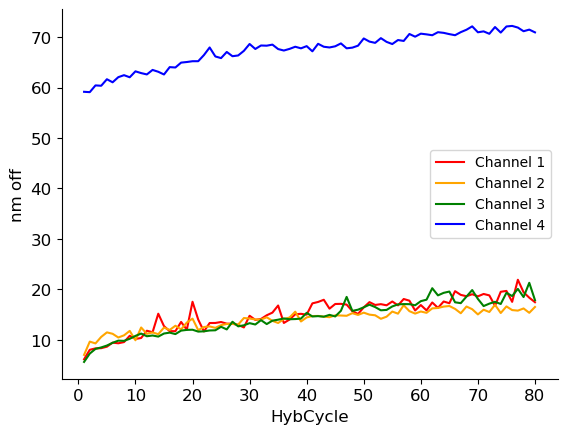

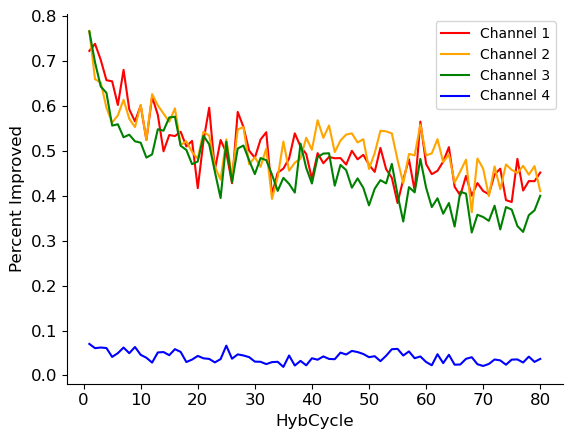

In [13]:
path_to_files ="/groups/CaiLab/personal/Lex/raw/Linus_10k_cleared_080918_NIH3T3/notebook_pyfiles/dapi_aligned/fiducial_aligned"
fa_affine.plot_error(path_to_files, num_hybcycles = 80, num_channels = 4, savefig = True, by_pos = False)

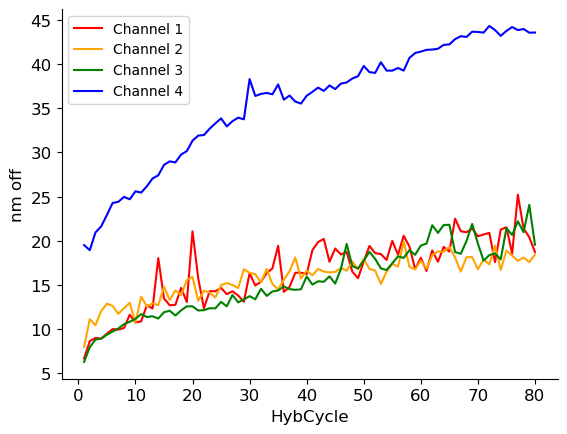

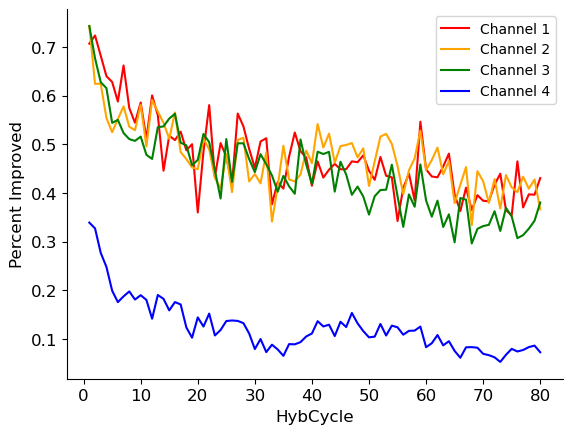

In [37]:
path_to_files ="/groups/CaiLab/personal/Lex/raw/Linus_10k_cleared_080918_NIH3T3/notebook_pyfiles/dapi_aligned/fiducial_aligned_gaussian"
fa_affine.plot_error(path_to_files, num_hybcycles = 80, num_channels = 4, savefig = True, by_pos = False)

# Compare dapi centroids between 2d gaussian fit and radial center

In [30]:
img = pil_imread(tiff_src, swapaxes=True)
img.shape

(2, 4, 2048, 2048)

In [31]:
dapi_gaus = fa_affine.get_alignment_dots(img[0][3], region_size=7, min_distance=10, 
                   threshold_abs=500, num_peaks=1000, eng = None, radial_center = False)

In [32]:
dapi_rad = fa_affine.get_alignment_dots(img[0][3], region_size=7, min_distance=10, 
                   threshold_abs=500, num_peaks=1000, eng = matlab.engine.start_matlab(), radial_center = True)

In [33]:
dapi_gaus = pd.DataFrame(dapi_gaus)
dapi_gaus.columns = ["x","y"]

dapi_rad = pd.DataFrame(dapi_rad)
dapi_rad.columns = ["x","y"]


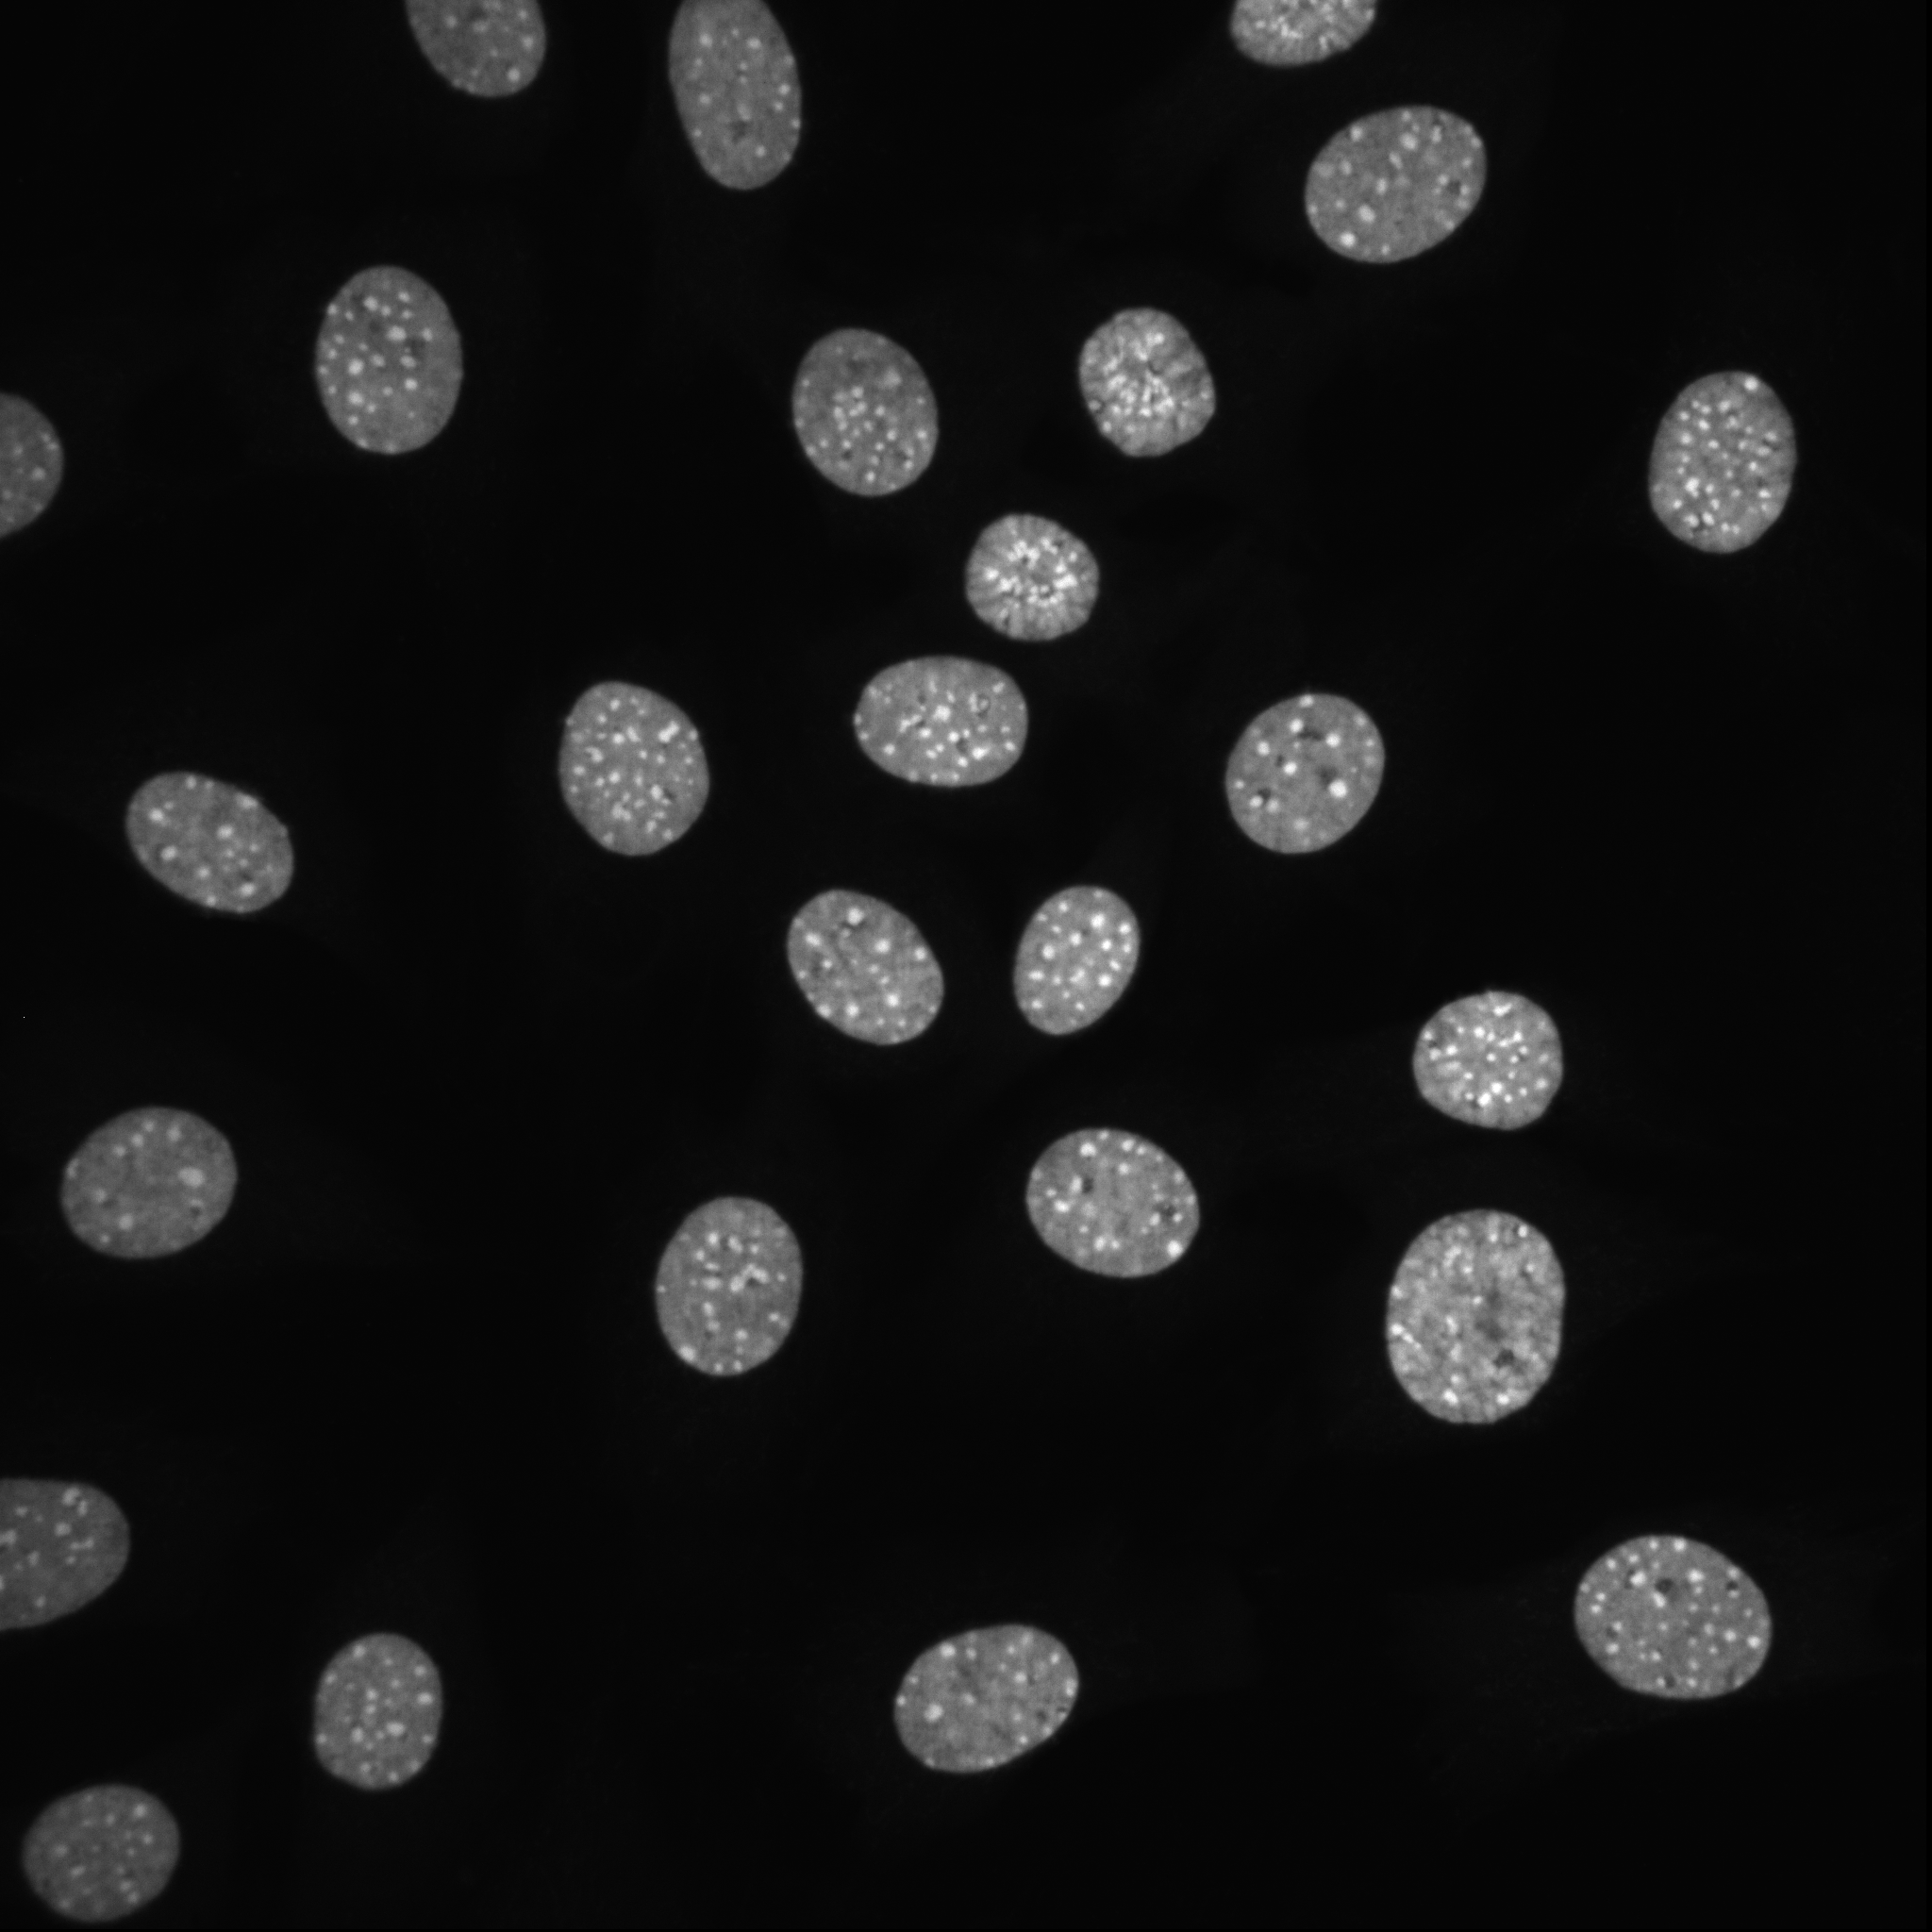

In [34]:
plot_2d_locs_on_2d_image(dapi_gaus, img[0][3], zmax=5000)


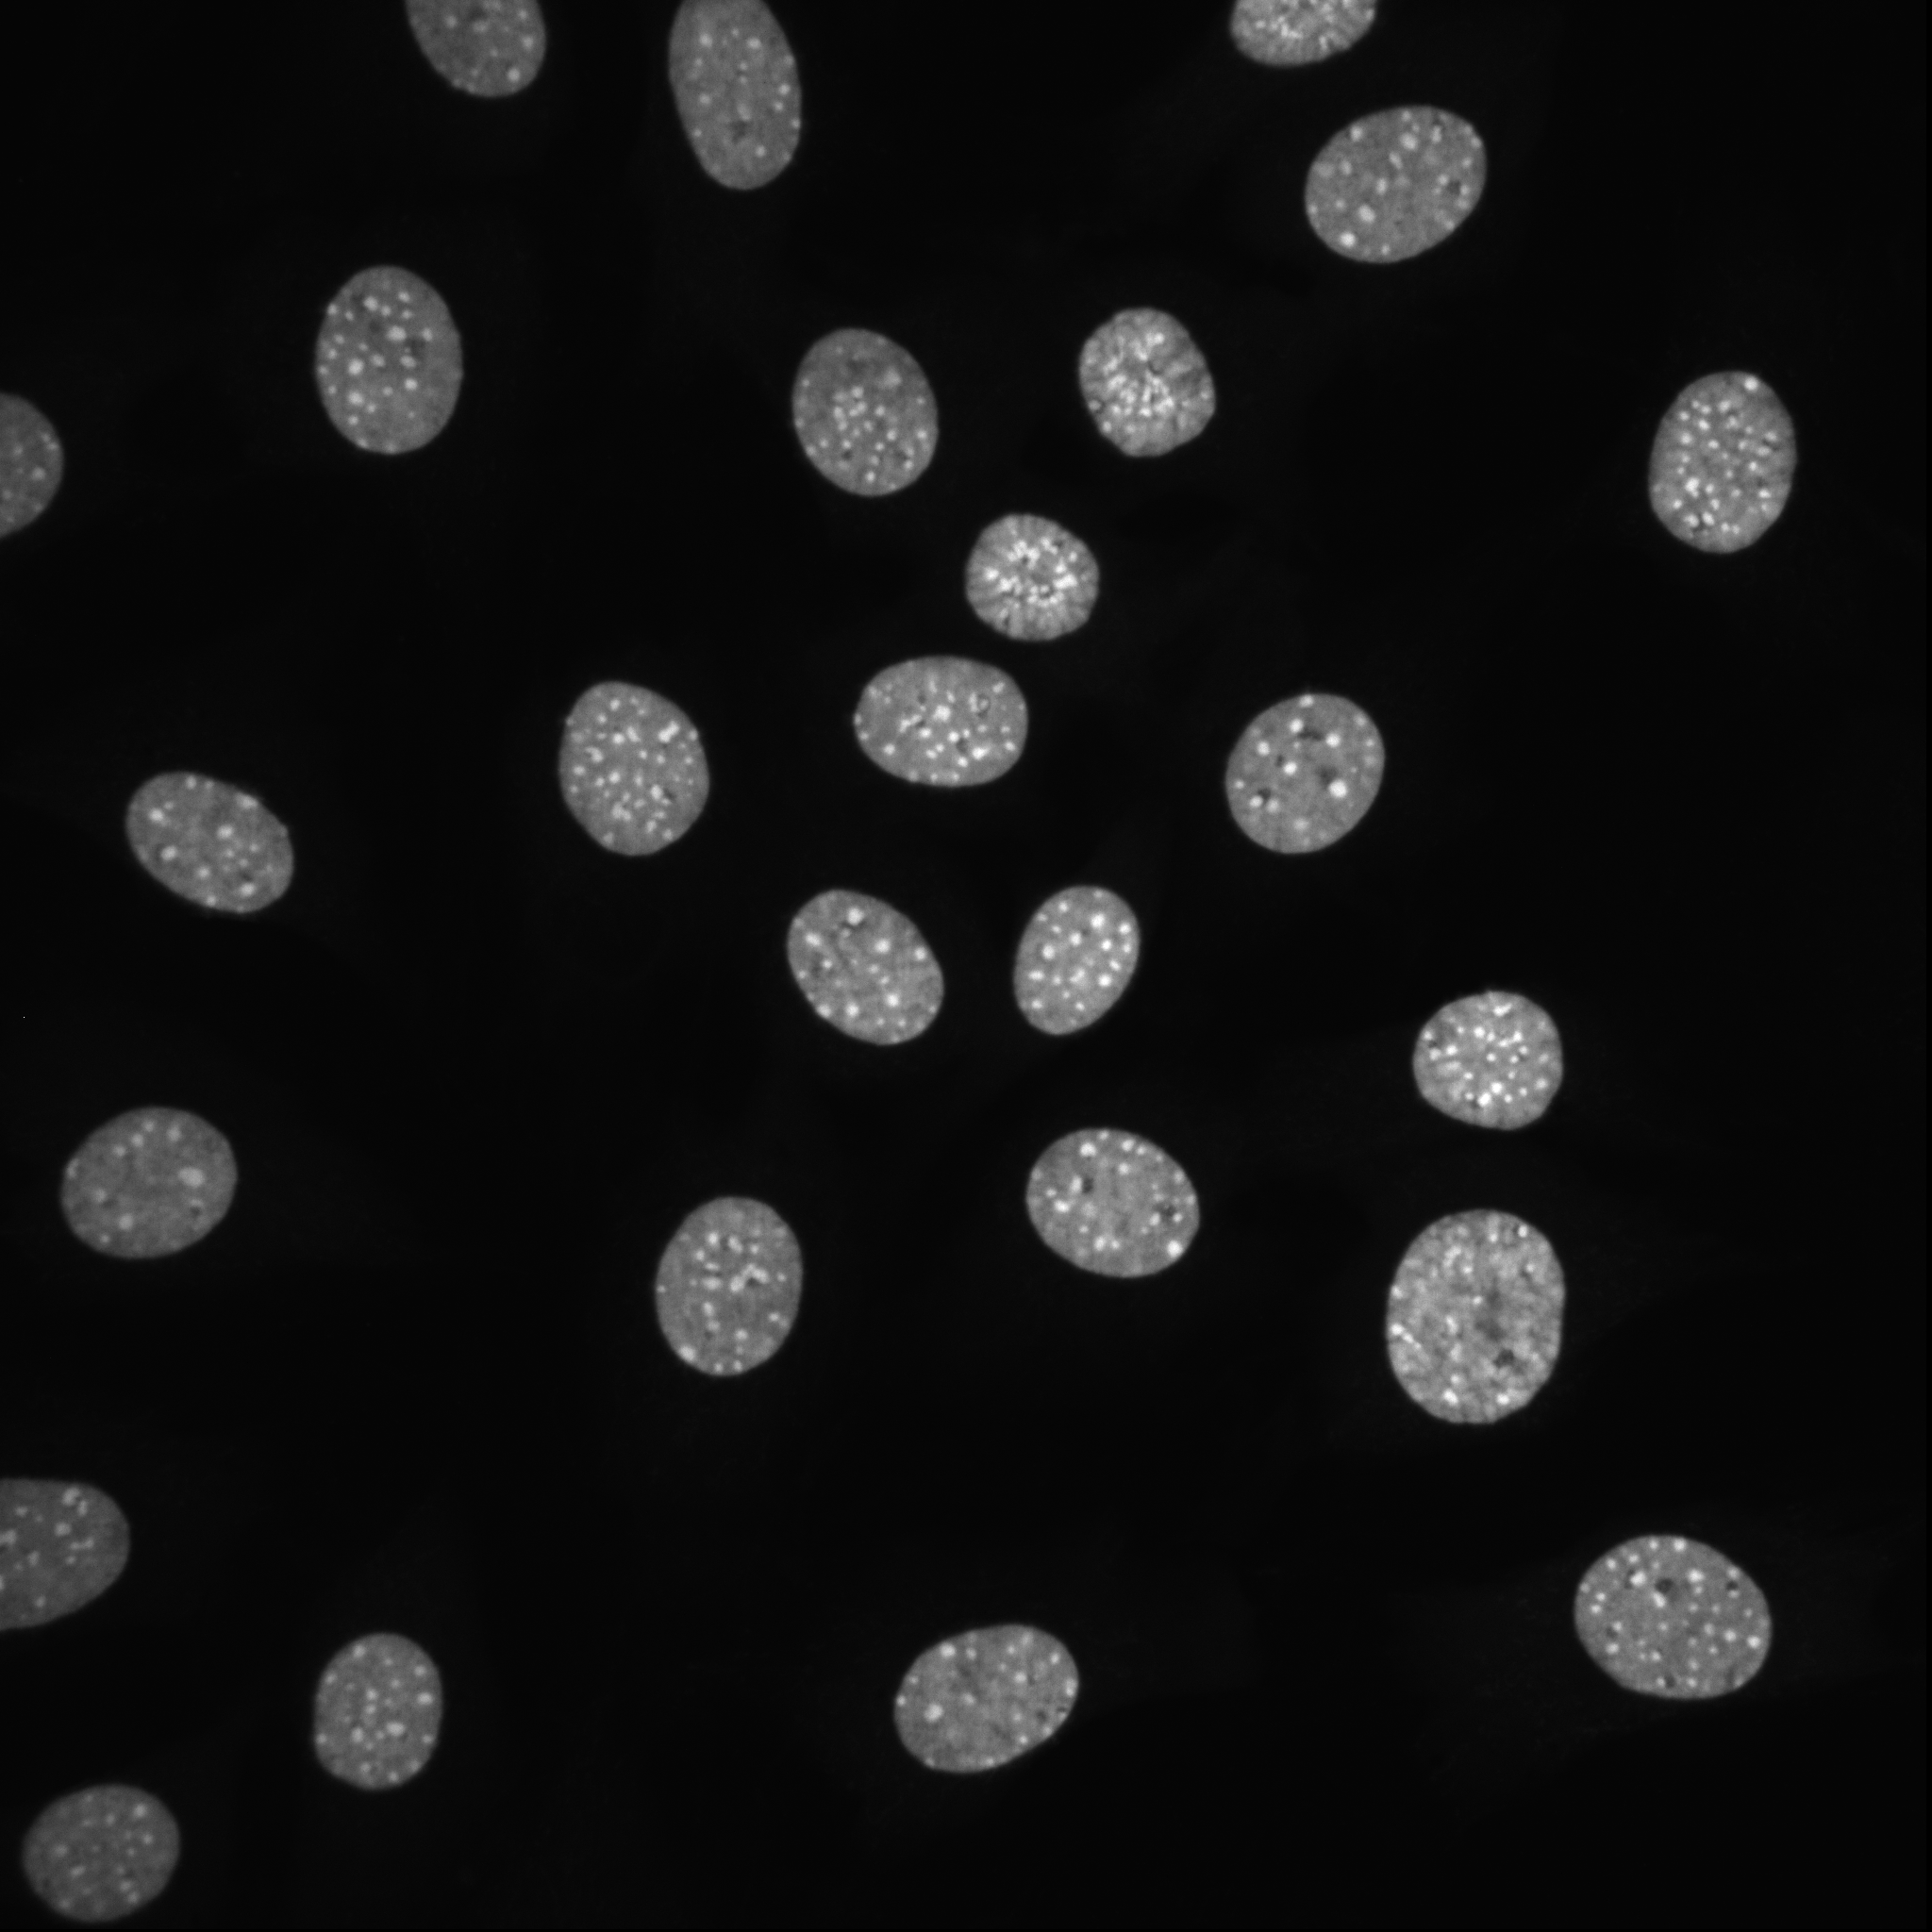

In [35]:
plot_2d_locs_on_2d_image(dapi_rad, img[0][3], zmax=5000)

The centroids look similar, but it could be hard to see by eye since they are essentially off by 50 nm max when compared against gaussian fitting.

In [43]:
#lets calculate distance between each row (should be the same dots)

dist_list = []
for i in range(len(dapi_gaus)):
    dist = np.linalg.norm(dapi_gaus.values[i]-dapi_rad.values[i])
    dist_list.append(dist)

In [46]:
np.mean(dist_list)

0.9447436377207177